# Problem Description

We are given a `license dataset` which holds various information related the business license , The objective of out problem is to `predict license Status` for the given business. Lets start with delving deep into the data.

# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

# Loading Dataset

In [11]:
dataset=("../License_Data.csv")

In [14]:
data=pd.read_csv(dataset)
df=data.copy()
df.sample(3)

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
81003,31754-20070216,1778771,31959,1,CARL J & THOMAS J CONTI,CONTI CONSTRUCTION,2110 N 75TH CT 1ST,ELMWOOD PARK,IL,60707,...,2007-02-16T00:00:00,2008-02-15T00:00:00,2007-02-05T00:00:00,2007-02-06T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
53042,84517-20030131,315162,65554,2,IRINA SHOYKHET,IRINA SHOYKHET,3925 TRIUMVERA DR 8B,GLENVIEW,IL,60025,...,2003-01-31T00:00:00,1999-02-15T00:00:00,2003-01-30T00:00:00,2003-01-30T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
19083,1822403-20110616,2091908,318124,1,NATHANIEL D. BASA,NATHANIEL D. BASA,123 SE EAST AVE 3,OAK PARK,IL,60302,...,2011-06-16T00:00:00,2013-06-15T00:00:00,NaN,2011-08-12T00:00:00,2012-12-29T00:00:00,NaN,NaN,NaN,NaN,AAC


# Basic EDA and Statistic

In [15]:
df.shape

(85895, 32)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  object 
 1   LICENSE ID                         85895 non-null  int64  
 2   ACCOUNT NUMBER                     85895 non-null  int64  
 3   SITE NUMBER                        85895 non-null  int64  
 4   LEGAL NAME                         85895 non-null  object 
 5   DOING BUSINESS AS NAME             85894 non-null  object 
 6   ADDRESS                            85895 non-null  object 
 7   CITY                               85895 non-null  object 
 8   STATE                              85895 non-null  object 
 9   ZIP CODE                           85864 non-null  object 
 10  WARD                               36194 non-null  float64
 11  PRECINCT                           29194 non-null  flo

# Categorical features

In [19]:
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('Total Categorical features:', len(cat_features))
cat_features

Total Categorical features: 21


['ID',
 'LEGAL NAME',
 'DOING BUSINESS AS NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP CODE',
 'WARD PRECINCT',
 'LICENSE DESCRIPTION',
 'APPLICATION TYPE',
 'APPLICATION CREATED DATE',
 'APPLICATION REQUIREMENTS COMPLETE',
 'PAYMENT DATE',
 'CONDITIONAL APPROVAL',
 'LICENSE TERM START DATE',
 'LICENSE TERM EXPIRATION DATE',
 'LICENSE APPROVED FOR ISSUANCE',
 'DATE ISSUED',
 'LICENSE STATUS CHANGE DATE',
 'LOCATION',
 'LICENSE STATUS']

In [20]:
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
print('Total Numerical features:', len(num_features))
num_features

Total Numerical features: 11


['LICENSE ID',
 'ACCOUNT NUMBER',
 'SITE NUMBER',
 'WARD',
 'PRECINCT',
 'POLICE DISTRICT',
 'LICENSE CODE',
 'LICENSE NUMBER',
 'SSA',
 'LATITUDE',
 'LONGITUDE']

# Target Feature

In [21]:
df['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

# Change the column Names

In [29]:
new_col_name=[col.replace(" ","_").lower() for col in df.columns]

In [33]:
df.columns=new_col_name
df.columns

Index(['id', 'license_id', 'account_number', 'site_number', 'legal_name',
       'doing_business_as_name', 'address', 'city', 'state', 'zip_code',
       'ward', 'precinct', 'ward_precinct', 'police_district', 'license_code',
       'license_description', 'license_number', 'application_type',
       'application_created_date', 'application_requirements_complete',
       'payment_date', 'conditional_approval', 'license_term_start_date',
       'license_term_expiration_date', 'license_approved_for_issuance',
       'date_issued', 'license_status_change_date', 'ssa', 'latitude',
       'longitude', 'location', 'license_status'],
      dtype='object')

In [35]:
df['license_description'].value_counts()

Limited Business License                    50078
Home Repair                                 10633
Peddler, non-food                            2812
Home Occupation                              2809
Retail Food Establishment                    2321
                                            ...  
Indoor Special Event                            1
Affiliation                                     1
Airport Pushcart Liquor Midway - Class A        1
Not-For-Profit Club                             1
Motor Vehicle Services License                  1
Name: license_description, Length: 106, dtype: int64

In [37]:
df['license_description'].value_counts(normalize=True)[:10]

Limited Business License             0.583014
Home Repair                          0.123791
Peddler, non-food                    0.032738
Home Occupation                      0.032703
Retail Food Establishment            0.027021
Massage Therapist                    0.022725
Street Performer                     0.021992
Scavenger, Private                   0.018034
Hazardous Materials                  0.013109
Residential Real Estate Developer    0.012655
Name: license_description, dtype: float64

# Univariate Analysis

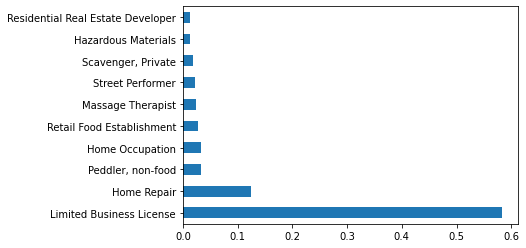

In [41]:
df.license_description.value_counts(normalize=True)[:10].plot.barh()
plt.show()

`Observation`: 58% of limited business license is contained out of 100%

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


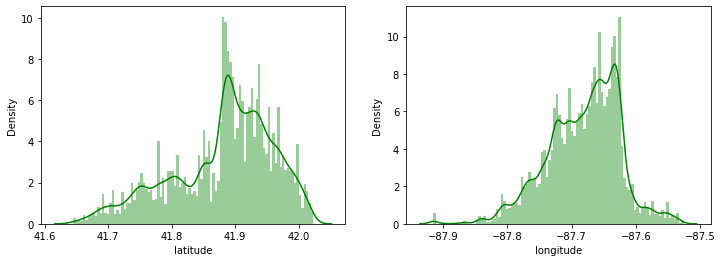

In [50]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['latitude'],color='g',bins=100, hist_kws={'alpha':0.4})
plt.subplot(1,2,2)
sns.distplot(df['longitude'],color='g',bins=100, hist_kws={'alpha':0.4})
plt.show()

# Bivariate Analysis

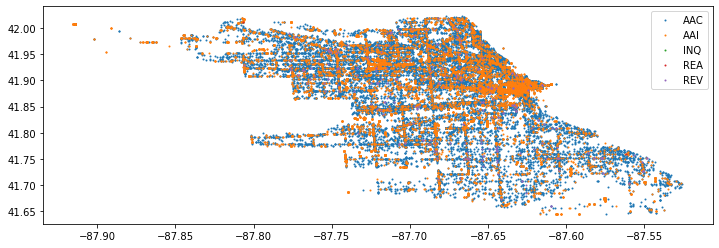

In [59]:
sdf=df[["longitude","latitude","license_status"]]
groups=sdf.groupby("license_status")

fig, ax=plt.subplots(figsize=(12,4))
ax.margins(0.05)

for name, group in groups:
    ax.plot(group.longitude, group.latitude,marker='o',linestyle='',ms=1,label=name)
    
ax.legend()
plt.show()

In [60]:
pd.crosstab(df['license_status'],df['application_type']).reset_index()

application_type,license_status,C_CAPA,C_EXPA,C_LOC,ISSUE,RENEW
0,AAC,7,3,287,7916,21987
1,AAI,0,0,1112,15425,38863
2,INQ,0,0,0,2,0
3,REA,0,0,0,0,3
4,REV,0,2,1,55,232


In [61]:
pd.crosstab(df['license_status'],df['application_type']).columns

Index(['C_CAPA', 'C_EXPA', 'C_LOC', 'ISSUE', 'RENEW'], dtype='object', name='application_type')

<AxesSubplot:title={'center':'Application Type vs License Status'}, xlabel='license_status'>

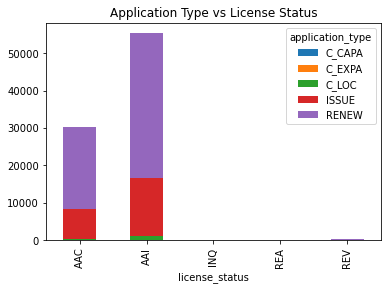

In [62]:
pd.crosstab(df['license_status'],df['application_type']).reset_index().plot(x='license_status',kind='bar',stacked=True,
                                                                           title='Application Type vs License Status')